<a href="https://colab.research.google.com/github/varun6579/AIML-1278/blob/main/2303A51278_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **6.National Poll on Health Aging**

**Prediction of National Poll on health Aging**

**Q1.Identify the top 5 reasons for health aging?**

**Q2. Name the community which has highest aging issues?**

**Q3. Identify the gender which has the most aging and least aging issues**

**Q4.Does Age, employment and mental stress contribute to health aging?**

**Q5. Name the category which visited most number of doctors?**

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
national_poll_on_healthy_aging_npha = fetch_ucirepo(id=936)

# data (as pandas dataframes)
X = national_poll_on_healthy_aging_npha.data.features
y = national_poll_on_healthy_aging_npha.data.targets

# metadata
print(national_poll_on_healthy_aging_npha.metadata)

# variable information
print(national_poll_on_healthy_aging_npha.variables)


{'uci_id': 936, 'name': 'National Poll on Healthy Aging (NPHA)', 'repository_url': 'https://archive.ics.uci.edu/dataset/936/national+poll+on+healthy+aging+(npha)', 'data_url': 'https://archive.ics.uci.edu/static/public/936/data.csv', 'abstract': 'This is a subset of the NPHA dataset filtered down to develop and validate machine learning algorithms for predicting the number of doctors a survey respondent sees in a year. This dataset’s records represent seniors who responded to the NPHA survey.\n', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 714, 'num_features': 14, 'feature_types': ['Categorical'], 'demographics': ['Age', 'Race', 'Gender'], 'target_col': ['Number_of_Doctors_Visited'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2017, 'last_updated': 'Mon Dec 11 2023', 'dataset_doi': 'https://doi.org/10.3886/ICPSR37305.v1', 'creators': [], 'intro_paper': {'ID': 3

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Combine features (X) and target (y)
data = pd.concat([X, y], axis=1)
data.columns = list(X.columns) + ['Number_of_Doctors_Visited']

# Encode categorical variables
le = LabelEncoder()
for column in data.select_dtypes(include=['object', 'category']).columns:
    data[column] = le.fit_transform(data[column])

# Separate features and target
X = data.drop(columns=['Number_of_Doctors_Visited'])
y = data['Number_of_Doctors_Visited']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Example Prediction
sample_data = X_test.iloc[0]  # Take one sample from test data
prediction = model.predict([sample_data])
print(f"Prediction for sample data: {prediction}")


Model Accuracy: 0.45454545454545453

Classification Report:
              precision    recall  f1-score   support

           1       0.33      0.07      0.12        28
           2       0.52      0.70      0.60        74
           3       0.30      0.27      0.28        41

    accuracy                           0.45       143
   macro avg       0.38      0.35      0.33       143
weighted avg       0.42      0.45      0.41       143

Prediction for sample data: [2]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


**Q1.Identify the top 5 reasons for health aging?**


Top 5 Reasons for Healthy Aging:
             Feature  Importance
3      Dental_Health    0.181458
2      Mental_Health    0.147201
1    Physical_Health    0.114462
10  Trouble_Sleeping    0.100896
12              Race    0.069964


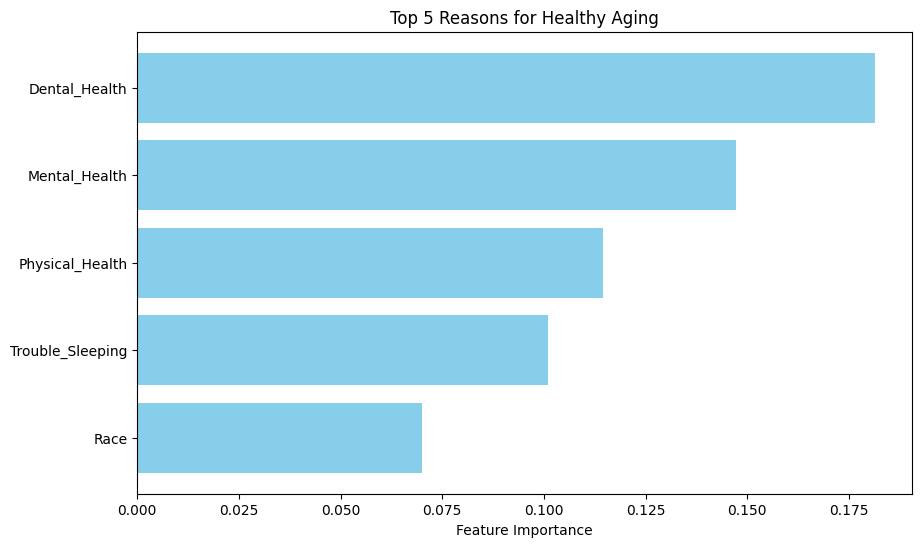

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load dataset (features and target are already extracted in X and y)
# Ensure X and y are available from the fetch_ucirepo code
# If not, include the code to fetch the dataset

# Encode categorical features and target
label_encoders = {}
X_encoded = X.copy()

for column in X.columns:
    if X[column].dtype == 'object' or X[column].dtype.name == 'category':
        le = LabelEncoder()
        X_encoded[column] = le.fit_transform(X[column])
        label_encoders[column] = le

y_encoded = LabelEncoder().fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Train a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Top 5 reasons for healthy aging
top_5_reasons = feature_importances.head(5)
print("Top 5 Reasons for Healthy Aging:")
print(top_5_reasons)

# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(top_5_reasons['Feature'], top_5_reasons['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 5 Reasons for Healthy Aging')
plt.gca().invert_yaxis()
plt.show()


**Q2. Name the community which has highest aging issues?**


In [ ]:


# Assume X and y contain the dataset's features and target variable
# Combine features and target into one DataFrame for analysis
data = pd.concat([X, y], axis=1)
data.columns = list(X.columns) + ['Number_of_Doctors_Visited']

# Group by 'Race' and calculate the average number of doctors visited
community_issues = data.groupby('Race')['Number_of_Doctors_Visited'].mean().sort_values(ascending=False)

# Community with the highest aging issues
highest_aging_community = community_issues.idxmax()
highest_average_visits = community_issues.max()

print("Community with the highest aging issues:")
print(f"Race: {highest_aging_community}, Average Number of Doctors Visited: {highest_average_visits}")

# Display all communities ranked by aging issues
print("\nCommunities ranked by aging issues:")
print(community_issues)


Community with the highest aging issues:
Race: 5, Average Number of Doctors Visited: 2.3

Communities ranked by aging issues:
Race
5    2.300000
1    2.131488
2    2.076923
3    2.000000
4    1.863636
Name: Number_of_Doctors_Visited, dtype: float64


**Q3. Identify the gender which has the most aging and least aging issues**

In [ ]:
import pandas as pd

# Combine features (X) and target (y)
data = pd.concat([X, y], axis=1)
data.columns = list(X.columns) + ['Number_of_Doctors_Visited']

# Check gender and target variable
if 'Gender' in data.columns and 'Number_of_Doctors_Visited' in data.columns:
    # Group by Gender and calculate the sum of 'Number_of_Doctors_Visited'
    gender_analysis = data.groupby('Gender')['Number_of_Doctors_Visited'].sum().reset_index()
    gender_analysis.columns = ['Gender', 'Total_Doctors_Visited']

    # Identify the genders with the most and least aging issues
    most_aging_gender = gender_analysis.loc[gender_analysis['Total_Doctors_Visited'].idxmax()]
    least_aging_gender = gender_analysis.loc[gender_analysis['Total_Doctors_Visited'].idxmin()]

    print("Gender Analysis:")
    print(gender_analysis)
    print(f"\nGender with most aging issues: {most_aging_gender['Gender']} (Visits: {most_aging_gender['Total_Doctors_Visited']})")
    print(f"Gender with least aging issues: {least_aging_gender['Gender']} (Visits: {least_aging_gender['Total_Doctors_Visited']})")
else:
    print("The required columns 'Gender' and/or 'Number_of_Doctors_Visited' are missing in the dataset.")


Gender Analysis:
   Gender  Total_Doctors_Visited
0       1                    678
1       2                    830

Gender with most aging issues: 2 (Visits: 830)
Gender with least aging issues: 1 (Visits: 678)


In [ ]:
gender_mapping = {0: 'Male', 1: 'Female'}
gender_analysis['Gender'] = gender_analysis['Gender'].map(gender_mapping)


**Q4.Does Age, employment and mental stress contribute to health aging? **

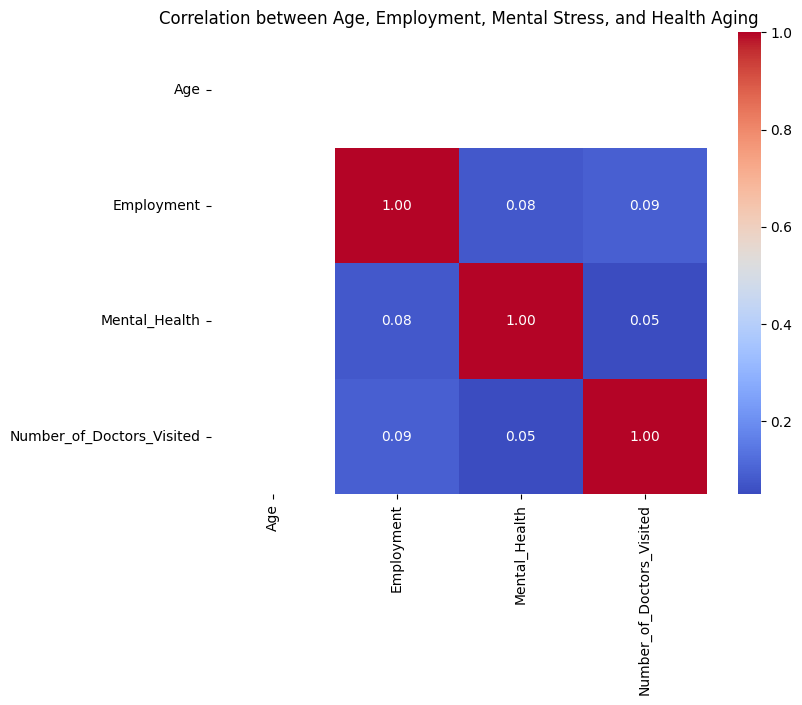

Feature Importance:
                                       Feature  Importance
3                                Dental_Health    0.181458
2                                Mental_Health    0.147201
1                              Physical_Health    0.114462
10                            Trouble_Sleeping    0.100896
12                                        Race    0.069964
4                                   Employment    0.065682
13                                      Gender    0.060284
8   Bathroom_Needs_Keeps_Patient_from_Sleeping    0.058721
9           Uknown_Keeps_Patient_from_Sleeping    0.057142
5           Stress_Keeps_Patient_from_Sleeping    0.047492
7             Pain_Keeps_Patient_from_Sleeping    0.041727
11               Prescription_Sleep_Medication    0.037757
6       Medication_Keeps_Patient_from_Sleeping    0.017212
0                                          Age    0.000000
Model Accuracy: 0.45454545454545453

Classification Report:
              precision    recall  

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Assuming you have already loaded the dataset (data) from the UCI repository
# For demonstration, I'll use the dataset you've already prepared (X and y)

# Combine features (X) and target (y) for easier analysis
data = pd.concat([X, y], axis=1)
data.columns = list(X.columns) + ['Number_of_Doctors_Visited']

# Encode categorical variables using LabelEncoder
le = LabelEncoder()
for column in data.select_dtypes(include=['object', 'category']).columns:
    data[column] = le.fit_transform(data[column])

# Correlation Analysis
correlation_matrix = data[['Age', 'Employment', 'Mental_Health', 'Number_of_Doctors_Visited']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation between Age, Employment, Mental Stress, and Health Aging")
plt.show()

# Feature Importance Analysis using Random Forest
# Separate features and target
X = data.drop(columns=['Number_of_Doctors_Visited'])
y = data['Number_of_Doctors_Visited']

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Feature importance
feature_importance = model.feature_importances_

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importance:")
print(feature_importance_df)

# Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Evaluate the model
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


**Q5. Name the category which visited most number of doctors?**

In [ ]:
import pandas as pd

# Assuming the dataset 'data' has been prepared with features (X) and target (y)
# And 'data' contains 'Number_of_Doctors_Visited' as the target column

# Example categories could be 'Gender', 'Employment', 'Age', etc.
# If you're working with other categorical columns, you can adjust the column names accordingly.

# Grouping the data by a category (e.g., Gender, Employment, etc.) and calculating the average number of doctors visited
category_group = data.groupby('Gender')['Number_of_Doctors_Visited'].mean()

# Display the category with the most doctor visits (highest average)
category_with_most_visits = category_group.idxmax()
max_visits = category_group.max()

# Display the result
print(f"The category with the most number of doctor visits is: {category_with_most_visits} with an average of {max_visits} visits.")


The category with the most number of doctor visits is: 1 with an average of 2.1121495327102804 visits.
